## Dealing with missing data

In [15]:
n <- 100
param <- c(1, -3)
x <- runif(n)
y <- param[1] + param[2] * x + rnorm(n)

In [16]:
missing <- sample(c(TRUE, FALSE), n, replace=TRUE, prob = c(0.3, 0.7))

In [17]:
df <- data.frame(x, y)
df$x[missing] <- NA

In [18]:
head(df)

x,y
0.3614622,0.4498493
NA,0.8274382
0.4749381,0.3777986
0.5907695,0.3059614
NA,-1.4881712
0.6653882,-0.7104215


In [19]:
head(x)

[1] 0.36146221 0.04178838 0.47493808 0.59076948 0.88930123 0.66538818

#### Which technique is the following?

In [20]:
ols <- lm(df$y ~ df$x)

In [21]:
summary(ols)


Call:
lm(formula = df$y ~ df$x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33549 -0.62289  0.01967  0.43538  2.62789 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.3832     0.2307   5.997 7.94e-08 ***
df$x         -3.5811     0.4013  -8.923 3.66e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.002 on 70 degrees of freedom
  (28 observations deleted due to missingness)
Multiple R-squared:  0.5321,	Adjusted R-squared:  0.5255 
F-statistic: 79.62 on 1 and 70 DF,  p-value: 3.66e-13


In [24]:
head(missing)

[1] FALSE  TRUE FALSE FALSE  TRUE FALSE

In [22]:
ols_explicit <- lm(df$y ~ df$x, subset = !missing)

In [23]:
ols_explicit$coefficients
ols$coefficients

(Intercept)        df$x 
   1.383215   -3.581078

(Intercept)        df$x 
   1.383215   -3.581078

In [25]:
length(ols$residuals)

[1] 72

In [26]:
n

[1] 100

#### Please demonstrate what trade-off was made by the above handling of the missing values

In [31]:
# Has missing values, ignore them
summary(ols)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.383215,0.2306621,5.996713,7.940065e-08
df$x,-3.581078,0.4013303,-8.923021,3.659588e-13


In [32]:
# complete data, no missing, no ignoring
summary(lm(y~x))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.050308,0.1944922,5.400257,4.654456e-07
x,-2.992053,0.3317133,-9.019998,1.619090e-14


#### How close are the slope estimates between the "drop missing data" vs "mean imputed" method?

In [34]:
ols_drop <- lm(y~x, df[!missing,])

In [35]:
impute_x <- x
impute_x[missing] <- mean(x, na.rm=TRUE)

In [38]:
ols_mean_impute <- lm(y ~ impute_x)

In [42]:
summary(ols_drop)$coefficients
summary(ols_mean_impute)$coefficients
# complete data, no missing, no ignoring
summary(lm(y~x))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.383215,0.2306621,5.996713,7.940065e-08
x,-3.581078,0.4013303,-8.923021,3.659588e-13


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.33294,0.2329763,5.721356,1.150276e-07
impute_x,-3.58397,0.4201740,-8.529728,1.855353e-13


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.050308,0.1944922,5.400257,4.654456e-07
x,-2.992053,0.3317133,-9.019998,1.619090e-14


In [41]:
length(ols_drop$residuals)
length(ols_mean_impute$residuals)

[1] 72

[1] 100

#### Scenario: X1 impacts the probability of missing data in X2 AND impacts Y

In [43]:
n <- 100
x1 <- runif(n)
x2 <- rnorm(n, 0, sd=0.3)
param <- c(1, 2, 3)
y <- cbind(1, x1, x2) %*% param + rnorm(n)

In [44]:
missing <- sapply(x1, function(xi)
    sample(c(TRUE, FALSE), 1, prob = c(xi, 1-xi)))

In [45]:
df <- data.frame(x1, x2, y)
df$x2[missing] <- NA

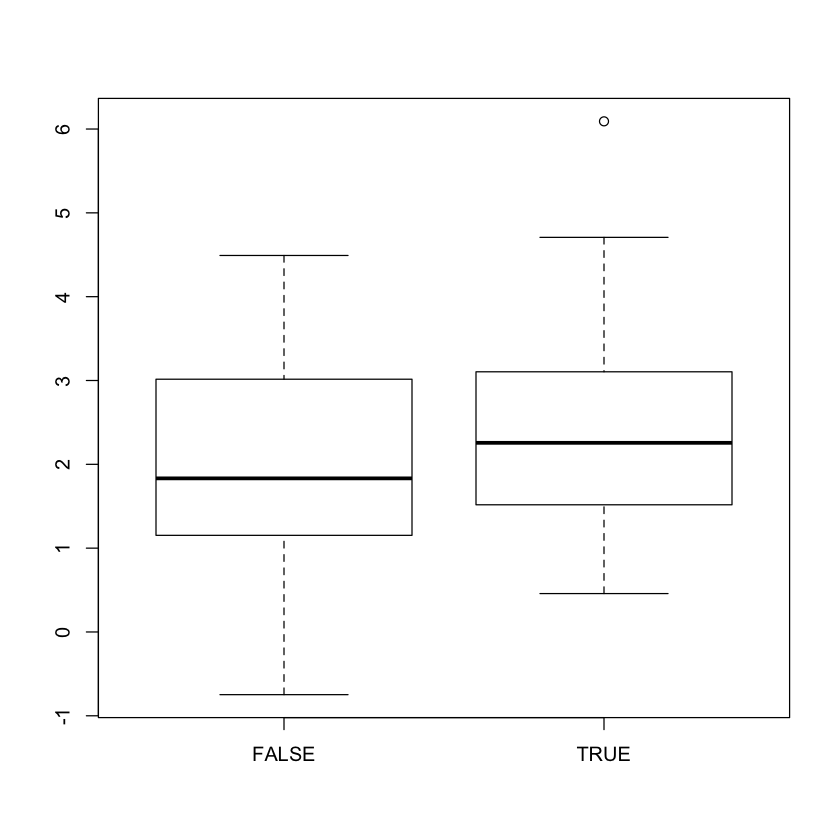

In [46]:
boxplot(df$y ~ is.na(df$x2))

In [12]:
summary(lm(y ~ x1 + x2, df))


Call:
lm(formula = y ~ x1 + x2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6420 -0.7399  0.1641  0.7718  1.6918 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0935     0.2644   4.135 0.000136 ***
x1            1.7827     0.6285   2.836 0.006570 ** 
x2            2.8710     0.4614   6.222 9.86e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9825 on 50 degrees of freedom
  (47 observations deleted due to missingness)
Multiple R-squared:  0.4655,	Adjusted R-squared:  0.4442 
F-statistic: 21.78 on 2 and 50 DF,  p-value: 1.578e-07


In [51]:
num_sim <- 1000
out <- matrix(NA, ncol=2, nrow=num_sim)
for(i in seq_len(num_sim)){
    sim_missing <- sapply(x1, function(xi) sample(c(TRUE, FALSE), 1, replace=TRUE, prob = c(xi, 1-xi)))
    sim_y <- cbind(1, x1, x2) %*% param + rnorm(n)
    # What is this model?
    ols <- lm(sim_y ~ x1 + x2, subset=!sim_missing)
    out[i, 1] <- ols$coefficients[3]
    # What is this model?
    ols <- lm(sim_y ~ x2, subset=!sim_missing)
    out[i, 2] <- ols$coefficients[2]
}

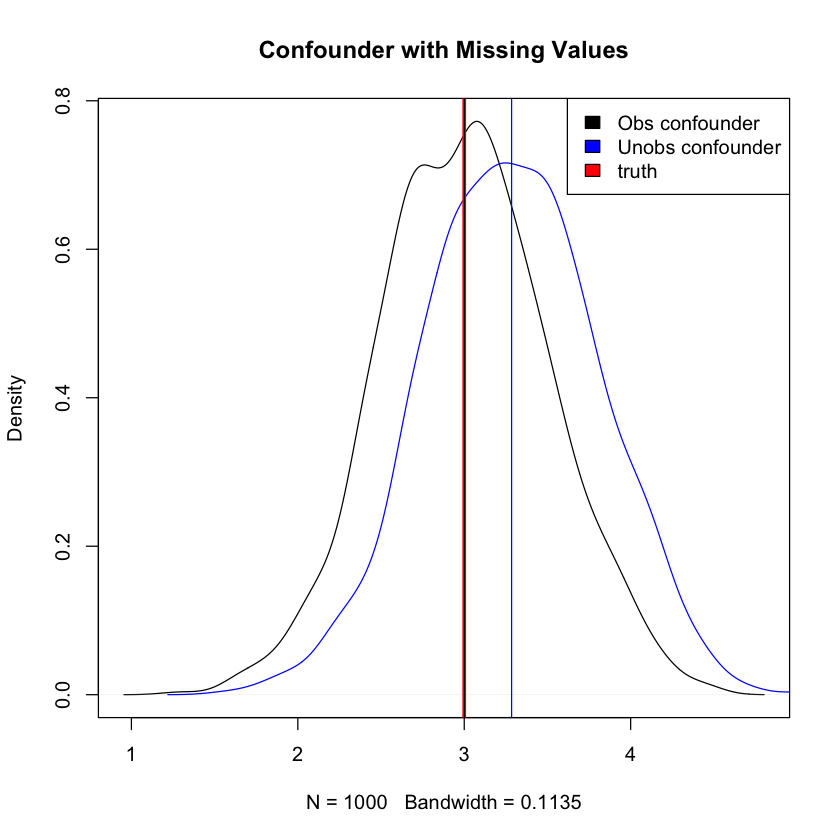

In [52]:
plot(density(out[, 1]), col="black", main="Confounder with Missing Values")
lines(density(out[, 2]), col="blue")
abline(v=param[3], col="red", lwd=3)
abline(v=mean(out[, 1]), col="black")
abline(v=mean(out[, 2]), col="blue")
legend("topright", legend=c("Obs confounder", "Unobs confounder", "truth"), fill=c("black", "blue", "red"))

#### Repeat the simulation above but make X2 a function of X1 by changing the mean of X2

What changes?

#### Example of Imputing via Regression vs using the Mean

In [308]:
n <- 100
x1 <- runif(n)
x2 <- rnorm(n, mean = x1^2, sd=0.3)
param <- c(1, 2, 3)

In [314]:
k <- 3
num_sim <- 1000
out <- matrix(NA, ncol=3, nrow=num_sim)
for(i in seq_len(num_sim)){
    sim_y <- cbind(1, x1, x2) %*% param + rnorm(n)
    sim_missing <- sapply(x1, function(xi) sample(c(TRUE, FALSE), 1, replace=TRUE, prob = c(xi, 1-xi)))
    ols <- lm(sim_y ~ x1 + x2, subset=!sim_missing)
    out[i, 1] <- ols$coefficients[k]
    x2_new <- x2
    x2_new[sim_missing] <- predict(lm(x2 ~ x1, subset=!sim_missing),
                                   data.frame(x1=x1[sim_missing]))
    ols <- lm(sim_y ~ x1 + x2_new)
    out[i, 2] <- ols$coefficients[k]
    x2_new[sim_missing] <- mean(x2[!sim_missing])
    ols <- lm(sim_y ~ x1 + x2_new)
    out[i, 3] <- ols$coefficients[k]
}

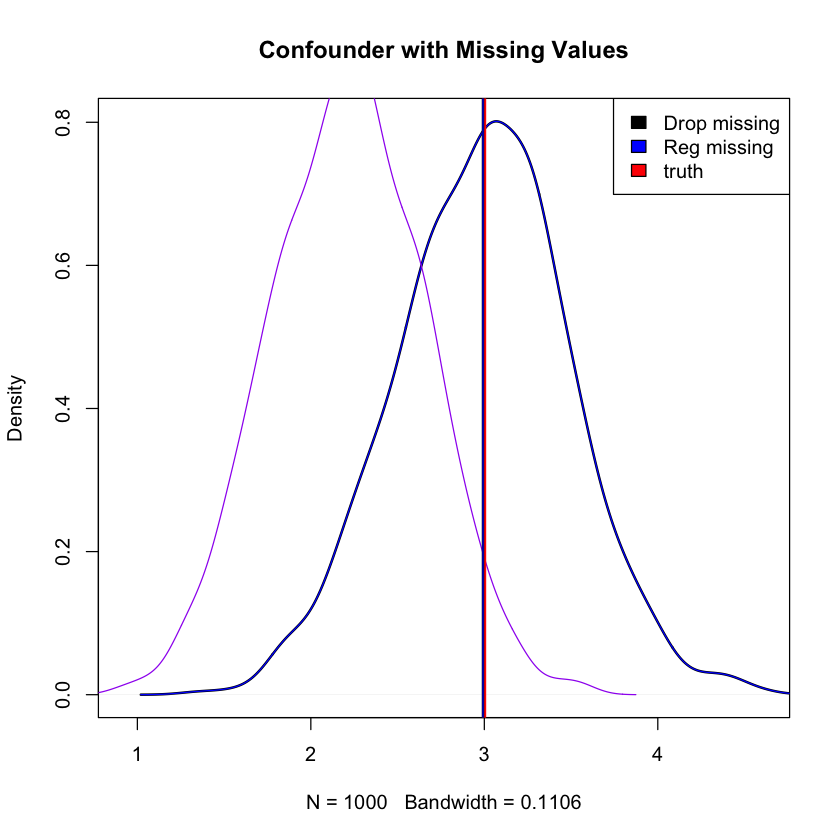

In [315]:
plot(density(out[, 1]), col="black", main="Confounder with Missing Values", lwd=2, xlim=range(out))
lines(density(out[, 2]), col="blue")
lines(density(out[, 3]), col="purple")
abline(v=param[3], col="red", lwd=3)
abline(v=mean(out[, 1]), col="black", lwd=2)
abline(v=mean(out[, 2]), col="blue")
legend("topright", legend=c("Drop missing", "Reg missing", "truth"), fill=c("black", "blue", "red"))

#### See the graph below, why is it biased?

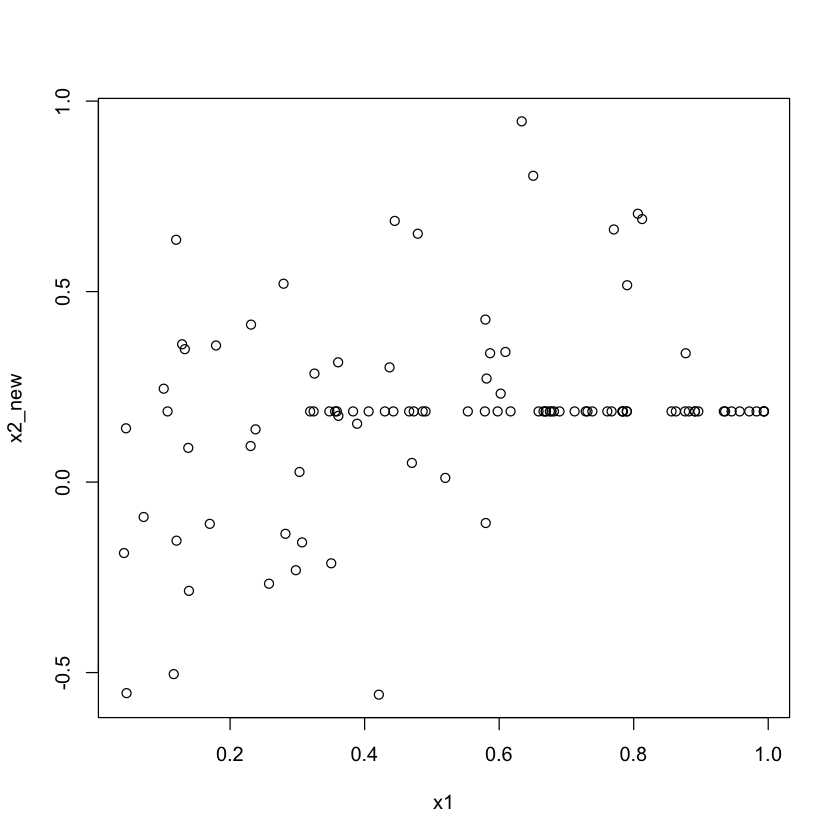

In [316]:
plot(x1, x2_new)